# WITHOUT FEATURE ENGINEERING - BASELINE

In [148]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

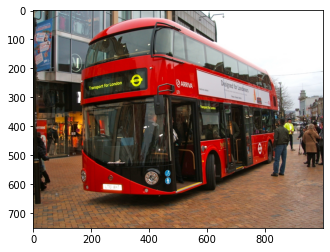

In [149]:
def dispImgNoFE(img_path):
    image_no_fe = Image.open(img_path)
    
    plt.imshow(image_no_fe)
    plt.axis('on')
    plt.show()
    
dispImgNoFE('final proj dset/dataset/train/Bus/Image_5.jpg')

In [150]:
def loadfromFolderNoFE(folder):
    images_no_fe = []
    vTypes_no_fe = []
    for label, vehicle in enumerate(os.listdir(folder)):
        vehicleFolder = os.path.join(folder, vehicle)
        type = os.path.basename(vehicleFolder)
        for filename in os.listdir(vehicleFolder):
            img_path = os.path.join(vehicleFolder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images_no_fe.append(img.flatten())  # Flatten the image
            vTypes_no_fe.append(type)
    return np.array(images_no_fe), np.array(vTypes_no_fe)

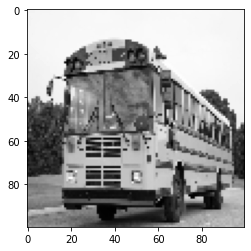

In [151]:
images_no_fe, vTypes_no_fe = loadfromFolderNoFE('final proj dset/dataset/train')

image_no_fe = images_no_fe[0] # Access the first image
vType_no_fe= vTypes_no_fe[0]  # Get the name corresponding to the image

# reshaping image
reshapeImg_no_fe = image_no_fe.reshape(100, 100)

# resizing the image 100x100 for display
resizedImg_no_fe = cv2.resize(reshapeImg_no_fe, (100, 100))

# Display the image

plt.imshow(resizedImg_no_fe, cmap="gray")
plt.axis('on')  # Hide axes
plt.show()


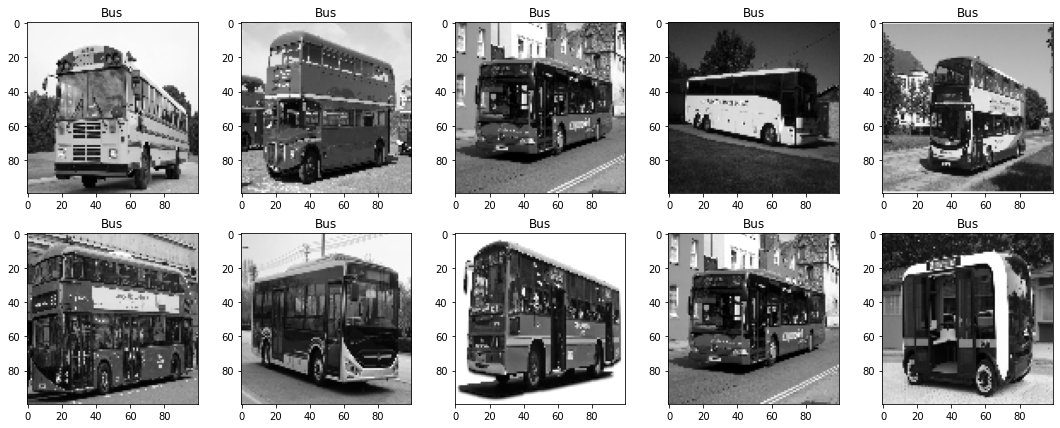

In [152]:
vehicles_no_fe = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop to display the images
for i in range(vehicles_no_fe):
    image_no_fe = images_no_fe[i].reshape(100,100)  
    vType_no_fe = vTypes_no_fe[i]  

    axes[i].imshow(image_no_fe, cmap='gray') 
    axes[i].set_title(vType_no_fe)  
    axes[i].axis('on') 

plt.tight_layout()
plt.show()

## training model

In [153]:
from sklearn.model_selection import train_test_split
from sklearn import svm

# Correct train_test_split with distinct variable names
X_train_no_fe, X_test_no_fe, y_train_no_fe, y_test_no_fe = train_test_split(images_no_fe, vTypes_no_fe, test_size=0.2, random_state=42)

# Train the SVM model
model_no_fe = svm.SVC(kernel='rbf', gamma='scale')
model_no_fe.fit(X_train_no_fe, y_train_no_fe)

SVC()

In [154]:
from sklearn.metrics import accuracy_score

y_pred_no_fe = model_no_fe.predict(X_test_no_fe)
accuracy_no_fe = accuracy_score(y_test_no_fe, y_pred_no_fe)
print(f'Accuracy: {accuracy_no_fe * 100:.2f}%')

Accuracy: 53.75%


In [155]:
from sklearn.metrics import classification_report

print(classification_report(y_test_no_fe, y_pred_no_fe))

              precision    recall  f1-score   support

         Bus       0.71      0.38      0.50        26
         Car       0.65      0.61      0.63        18
       Truck       0.38      0.61      0.47        18
  motorcycle       0.55      0.61      0.58        18

    accuracy                           0.54        80
   macro avg       0.57      0.55      0.54        80
weighted avg       0.59      0.54      0.54        80



## LOADING TEST IMAGES PREDICTION

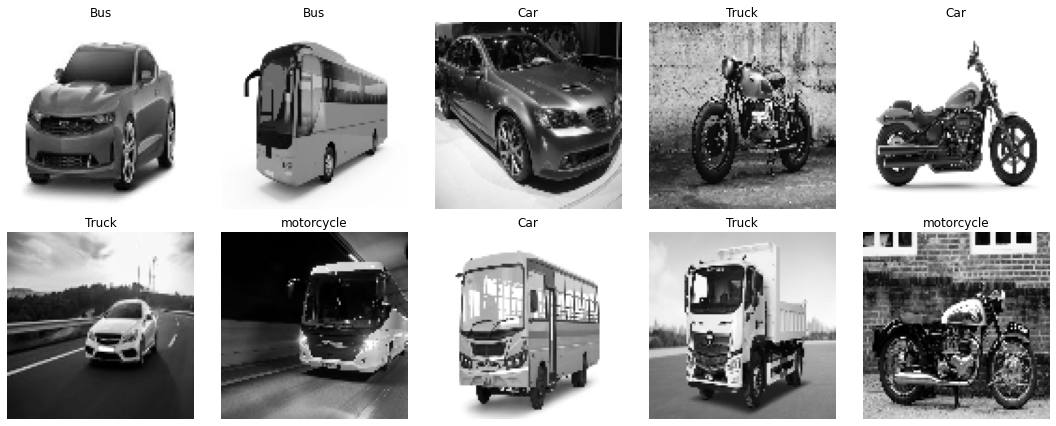

In [156]:
import random

def loadTestImagesNoFE(folder):
    test_images_no_fe = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
        test_images_no_fe.append(img.flatten())  # Flatten the image
    return np.array(test_images_no_fe)

test_folder_no_fe = 'final proj dset/dataset/test' 
test_images_no_fe = loadTestImagesNoFE(test_folder_no_fe)

predictions_no_fe = model_no_fe.predict(test_images_no_fe)

random_indices = random.sample(range(len(test_images_no_fe)), 10)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))  
axes = axes.flatten()  

for i, idx in enumerate(random_indices):
    image_no_fe = test_images_no_fe[idx].reshape(100, 100) 
    predicted_type_no_fe = predictions_no_fe[idx]  

    axes[i].imshow(image_no_fe, cmap='gray') 
    axes[i].set_title(predicted_type_no_fe)  
    axes[i].axis('off') 

plt.tight_layout()
plt.show()

# WITH FEATURE ENGINEERING - MODIFIED

In [157]:
import matplotlib.pyplot as plt
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

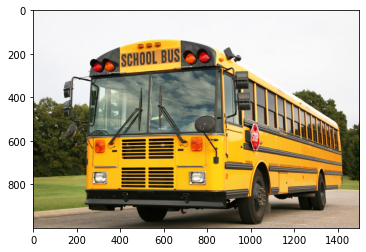

In [158]:
def dispImgFE(img_path):
    image = Image.open(img_path)
    
    plt.imshow(image)
    plt.axis('on')
    plt.show()
    
dispImgFE('final proj dset/dataset/train/Bus/Image_1.jpg')

## FEATURE ENGINEERING

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import train_test_split

# Function to load images from a folder
def loadfromFolderFE(folder):
    images_fe = []
    vTypes_fe = []
    for label, vehicle_fe in enumerate(os.listdir(folder)):
        vehicleFolder = os.path.join(folder, vehicle_fe)
        type = os.path.basename(vehicleFolder)
        for filename in os.listdir(vehicleFolder):
            img_path = os.path.join(vehicleFolder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            
            # Extract HOG features
            features_fe = hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False)
            images_fe.append(features_fe)  # Append HOG features
            vTypes_fe.append(type)
    
    return np.array(images_fe), np.array(vTypes_fe)

## TRAINING THE MODEL - RBF WITH FE

In [164]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import train_test_split


images_fe, vTypes_fe = loadfromFolderFE('final proj dset/dataset/train/')

# Split the data
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(images_fe, vTypes_fe, test_size=0.2, random_state=48)

model_fe = svm.SVC(kernel='rbf', C=1.0, class_weight='balanced')

model_fe.fit(X_train_fe, y_train_fe)

y_pred_fe= model_fe.predict(X_test_fe)

accuracy_fe = accuracy_score(y_test_fe, y_pred_fe)

print(f"Accuracy: {accuracy_fe * 100:.2f}%")


Accuracy: 87.50%


In [165]:
from sklearn.metrics import classification_report

print(classification_report(y_test_fe, y_pred_fe))

              precision    recall  f1-score   support

         Bus       0.75      0.88      0.81        17
         Car       0.95      1.00      0.98        21
       Truck       0.88      0.64      0.74        22
  motorcycle       0.91      1.00      0.95        20

    accuracy                           0.88        80
   macro avg       0.87      0.88      0.87        80
weighted avg       0.88      0.88      0.87        80



## PREDICT 10 RANDOM IMAGES

In [166]:
import os
import cv2
import random
import matplotlib.pyplot as plt
from skimage.feature import hog

def loadTestImageFE(test_folder):
    image_paths_fe = []
    for filename in os.listdir(test_folder):
        img_path = os.path.join(test_folder, filename)
        # Check if it's a file and not a directory
        if os.path.isfile(img_path):
            image_paths_fe.append(img_path)
    return image_paths_fe

def predictImageFE(img_path_fe, model_fe):
    # Load and preprocess the image
    img = cv2.imread(img_path_fe)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
    
    # Extract HOG features
    features_fe = hog(img, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=False)
    
    # Reshape features for prediction
    features_fe = features_fe.reshape(1, -1)  # Ensure shape is (1, 900)
    
    prediction = model_fe.predict(features_fe)
    
    return prediction[0], img  # Return predicted label and the image



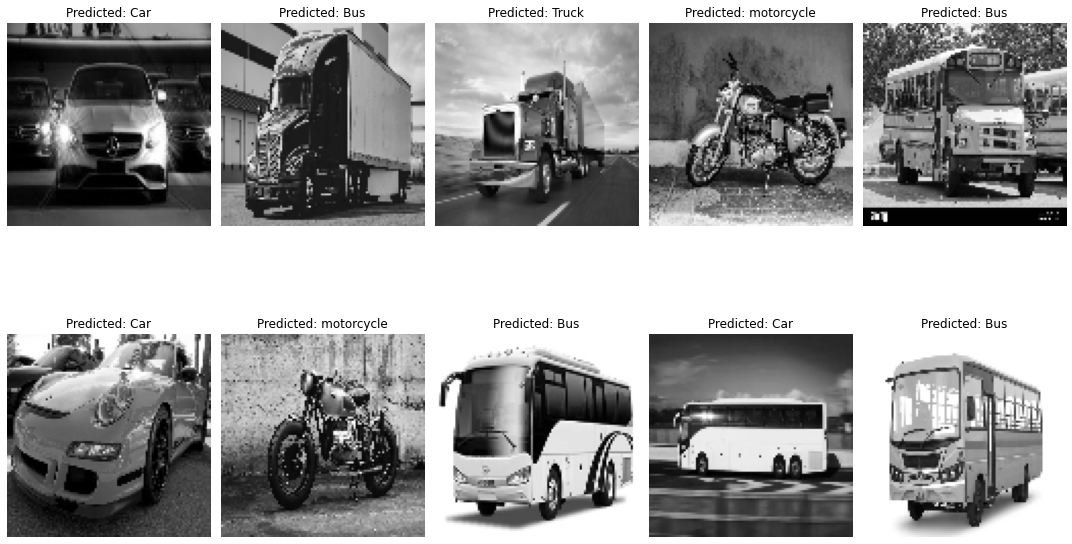

In [167]:
test_folder = 'final proj dset/dataset/test/'  
test_image_paths = loadTestImageFE(test_folder)

# Randomly select images for prediction
random_test_images = random.sample(test_image_paths, min(10, len(test_image_paths)))

predictions = []
images = []

for img_path in random_test_images:
    predicted_label, img = predictImageFE(img_path, model_fe)  # Using the RBF model
    predictions.append(predicted_label)
    images.append(img)

plt.figure(figsize=(15, 10))

for i in range(len(images)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Predicted: {predictions[i]}')
    plt.axis('off')

plt.tight_layout() 
plt.show()


# COMPARISON OF TWO SVM - GRAPH

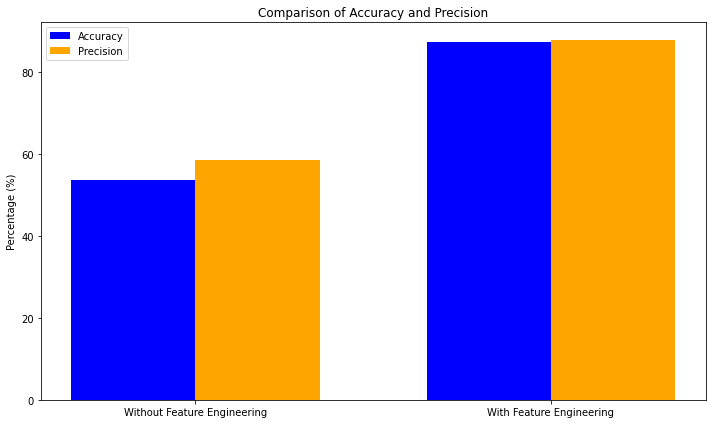

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score


precision_no_fe = precision_score(y_test_no_fe, y_pred_no_fe, average='weighted')


precision_fe = precision_score(y_test_fe, y_pred_fe, average='weighted')

accuracy_values = [accuracy_no_fe * 100, accuracy_fe * 100]
precision_values = [precision_no_fe * 100, precision_fe * 100]

model_labels = ['Without Feature Engineering', 'With Feature Engineering']

x = range(len(model_labels))  # x-coordinates for the bars

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35  # Width of the bars
ax.bar(x, accuracy_values, width=bar_width, label='Accuracy', color='blue', align='center')
ax.bar([p + bar_width for p in x], precision_values, width=bar_width, label='Precision', color='orange', align='center')

ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of Accuracy and Precision')
ax.set_xticks([p + bar_width / 2 for p in x])
ax.set_xticklabels(model_labels)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


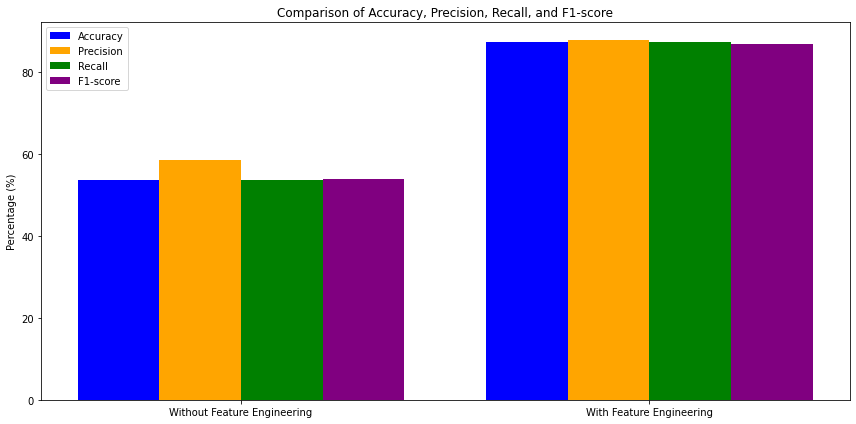

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision_no_fe = precision_score(y_test_no_fe, y_pred_no_fe, average='weighted')
recall_no_fe = recall_score(y_test_no_fe, y_pred_no_fe, average='weighted')
f1_no_fe = f1_score(y_test_no_fe, y_pred_no_fe, average='weighted')

precision_fe = precision_score(y_test_fe, y_pred_fe, average='weighted')
recall_fe = recall_score(y_test_fe, y_pred_fe, average='weighted')
f1_fe = f1_score(y_test_fe, y_pred_fe, average='weighted')

accuracy_values = [accuracy_no_fe * 100, accuracy_fe * 100]
precision_values = [precision_no_fe * 100, precision_fe * 100]
recall_values = [recall_no_fe * 100, recall_fe * 100]
f1_values = [f1_no_fe * 100, f1_fe * 100]

model_labels = ['Without Feature Engineering', 'With Feature Engineering']

x = range(len(model_labels))  # x-coordinates for the bars
bar_width = 0.2  # Width of each bar

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x, accuracy_values, width=bar_width, label='Accuracy', color='blue', align='center')
ax.bar([p + bar_width for p in x], precision_values, width=bar_width, label='Precision', color='orange', align='center')
ax.bar([p + 2 * bar_width for p in x], recall_values, width=bar_width, label='Recall', color='green', align='center')
ax.bar([p + 3 * bar_width for p in x], f1_values, width=bar_width, label='F1-score', color='purple', align='center')

ax.set_ylabel('Percentage (%)')
ax.set_title('Comparison of Accuracy, Precision, Recall, and F1-score')
ax.set_xticks([p + 1.5 * bar_width for p in x])  # Centering x-ticks
ax.set_xticklabels(model_labels)
ax.legend()

plt.tight_layout()
plt.show()
